# Using poWR synthetic spectra

In [1]:
import VPtools as vp
import matplotlib.pyplot as plt

path_google = '/Users/vpetit/Library/CloudStorage/GoogleDrive-vpetit@udel.edu/Shared drives/'


## 1. How to access the synthetic spectra

The synthetic spectra can be downloaded from the PoWR website: https://www.astro.physik.uni-potsdam.de/PoWR/powrgrid1.php

These are non-LTE models with winds. 
:::{warning}
These models include wind lines -- therefore doing a rotation convolution will not be acurate for these lines, and for absorption lines that might be close the them. 
:::

ADD LINK TO PAPERS

We have a copy of these grids on the ResearchGroupResources Google Drive at ReferenceMaterial/poWR
* griddl-gal-ob-vd3-line_NIR
* griddl-gal-ob-vd3-line_VIS

We have a csv table on the google drive, that lists all of the models available

In [2]:
table = vp.poWR.get_table_gal()
display(table)

,MODEL,T_EFF,R_TRANS,MASS,LOG G,LOG L,LOG MDOT,V_INF
0,NAME,[K],[R_SUN],[M_SUN],[CGS],[L_SUN],[M_SUN/YR],[KM/S]
1,15-20,15000,20.9504,32,2,5.6,-4.6,210
2,15-22,15000,318.4365,23.8,2.2,5.27,-6.3,439
3,15-24,15000,502.3408,18,2.4,4.95,-6.8,478
4,15-26,15000,903.4271,13.4,2.6,4.62,-7.4,512
...,...,...,...,...,...,...,...,...
239,52-42,52000,114.9568,86.3,4.2,5.99,-5.8,3618
240,53-42,53000,103.2947,94,4.2,6.06,-5.7,3640
241,54-42,54000,93.9893,104.9,4.2,6.14,-5.6,3664
242,55-42,55000,85.7949,117.1,4.2,6.22,-5.5,3702


The column "MODEL" gives the name that shows up in the file name. The first number is the effective temparature (in hundreds of kelvins) and the other number is the log(g) times 10.

So the model with $T_\mathrm{eff}=15,000K$ and $\log(g)=4.2$ is `15-42`.

The file paths and names might be a bit difficult to remember, so we have a template path/name that we can access in the module:

In [3]:
print(vp.poWR.gal_path_name)

ResearchGroupResources-Files/ReferenceMaterial/poWR/griddl-gal-ob-vd3-line_{}/gal-ob-vd3_{}_line.txt


and you can use the `format` function to add the model name and the wavelenght range that you would like to use.

In [4]:
my_model_name = vp.poWR.gal_path_name.format('NIR','15-24')
print(my_model_name)

ResearchGroupResources-Files/ReferenceMaterial/poWR/griddl-gal-ob-vd3-line_NIR/gal-ob-vd3_15-24_line.txt


## 2. How to read in a synthetic spectrum

We can read in one of the synthetic spectrum using the `read` function in the `poWR` module.

In [5]:
spec = vp.poWR.read(path_google+my_model_name)

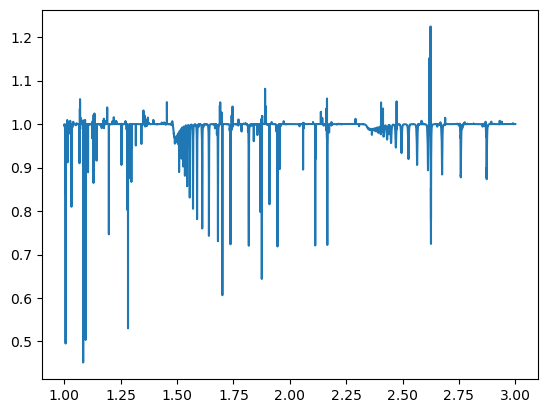

In [6]:
fig, ax = plt.subplots(1,1)

ax.plot(spec.wl, spec.specI)